# ZMQ REQ-REP Tests

In [1]:
from real_fast_interactor import RFInteractor

In [2]:
rfi = RFInteractor(ZmqInAddress='tcp://127.0.0.1:5555', ZmqOutAddress=None, verbose=False, path_out='./zmq_out/', name='OFZMQ_test03')

ZMQ Real Time interactor for FAST initialized. 
 PUB-SUB protocol: None | REQ-REP protocol: tcp://127.0.0.1:5555


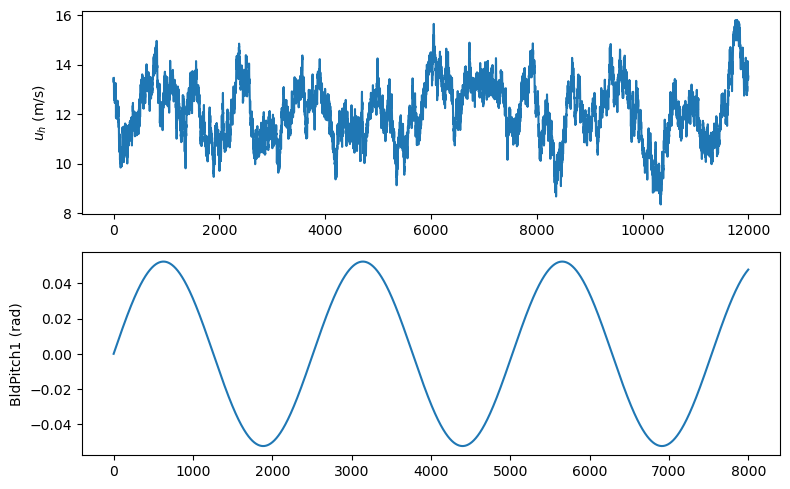

In [3]:
from pyFAST.input_output import FASTOutputFile
import numpy as np 
import matplotlib.pyplot as plt 


t = np.linspace(0, 20, int(80/0.01))

wind_series = FASTOutputFile('./ex_files/tsim.dat').toDataFrame()['U_[3.40]']
bld_pitch = np.deg2rad(3 * np.sin(t))

fig, axs = plt.subplots(2, 1, figsize=(8, 5))
axs[0].plot(wind_series)
axs[0].set_ylabel('$u_h$ (m/s)')

axs[1].plot(bld_pitch)
axs[1].set_ylabel('BldPitch1 (rad)')

fig.tight_layout()

In [4]:
count_sampling = 0

while True:
    
    if count_sampling >= len(wind_series):
        count_sampling = 0   
     
    rep = {'VelH': wind_series[count_sampling], 
           'BlPitchCom1': bld_pitch[count_sampling]}
           
    rfi.fast_rep(rep, verbose=True)
    count_sampling += 1

Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
Request received: VelH;BldPitchCom1;
R

IndexError: index 8000 is out of bounds for axis 0 with size 8000

In [8]:
rfi.fast_rep({'VelH': 0, 'BlPitchCom1': 0}, verbose=True)

KeyboardInterrupt: 

In [5]:
from openfast_toolbox.io import FASTOutputFile

fastout = FASTOutputFile('../templatesDir/OFZMQ_test03/OFZMQ_test03.outb').toDataFrame()

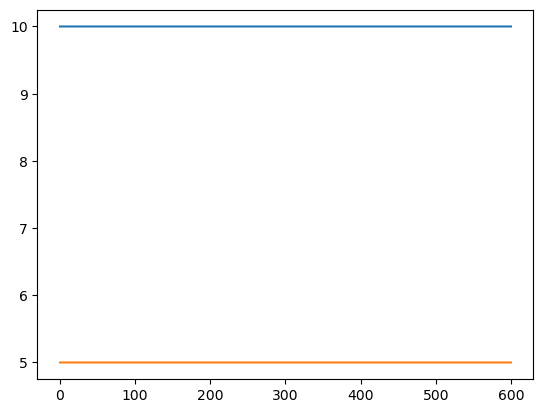

In [10]:
plt.plot(fastout['Time_[s]'], fastout['Wind1VelX_[m/s]'])
plt.plot(fastout['Time_[s]'], fastout['BldPitch1_[deg]'])